<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Feature%20Selection%20Complete/Filter%20Methods/chi_square_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chi-Square Test**
Compute chi-squared test between categorical features and classification target.

In [1]:
# Import important libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
filename = "/content/drive/MyDrive/Data Science/Feature Selection/titanic_clean.csv"

In [6]:
df = pd.read_csv(filename)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22,S
2,1,0,female,2.0000,1,2,151.5500,C22,S
3,1,0,male,30.0000,1,2,151.5500,C22,S
4,1,0,female,25.0000,1,2,151.5500,C22,S


In [7]:
data = df[["pclass", "survived", "sex", "sibsp", "parch", "embarked"]]
data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [14]:
# Separate the data in features and labels
X = data.drop(labels="survived", axis=1)
y = data["survived"]

In [15]:
# Split the data in train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((914, 5), (392, 5))

In [16]:
# Contingency table for gender
c = pd.crosstab(y_train, X_train["sex"])
c

sex,female,male
survived,,
0,90,477
1,228,119


In [17]:
# Provide this contingencey table to the chi_contingency
chi2_contingency(c)

Chi2ContingencyResult(statistic=233.4328744513778, pvalue=1.0634411614151734e-52, dof=1, expected_freq=array([[197.27133479, 369.72866521],
       [120.72866521, 226.27133479]]))

In [19]:
# Goal is to analyze all the categorical features
# Create a contigency tables for all the features and
# feed it to the chi contingency and get the chi-square value
# and rank the feature according to the p-value
chi_ls = []

for feature in X_train.columns:

  c = pd.crosstab(y_train, X_train[feature])

  pvalue = chi2_contingency(c)[1]

  # append the chi-square values to the list
  chi_ls.append(pvalue)

In [20]:
chi_ls

[1.3186611708301984e-23,
 1.0634411614151734e-52,
 0.0005479972837093755,
 3.9942832693779826e-05,
 1.202650042837567e-06]

Text(0.5, 1.0, 'Feature importance based on chi-square test')

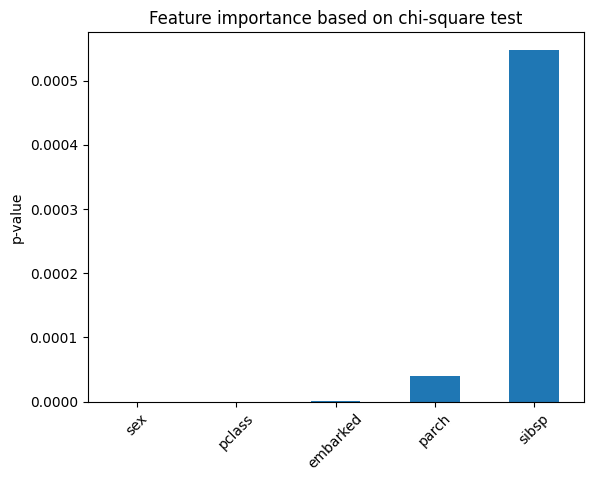

In [21]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p-value")
plt.title("Feature importance based on chi-square test")

In [24]:
# We will select those categorical features which has
# least p-value
selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
          ascending=True)[0:3].index
selected

Index(['sex', 'pclass', 'embarked'], dtype='object')